<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/7_5_%EB%94%94%EC%97%90%ED%84%B0_%EC%8A%A4%EC%BC%80%EC%9D%BC_%EB%B3%80%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
#if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
!pip install -q --upgrade scikit-learn
# mglearn을 다운받고 압축을 풉니다.
!wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
!tar -xzf mglearn.tar.gz
# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fm._rebuild()

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(10,6)})

from pandas.core.common import random_state

In [4]:
import os.path

if not os.path.isfile('data/aclImdb_v1.tar.gz'):
  !wget -q http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
  !tar -xzf data/aclImdb_v1.tar.gz -C data
    

In [5]:
!find ./data -type d
!rm -r data/aclImdb/train/unsup  ## 긍정 부정 레이블이 없는 데이터 삭제

./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/neg
./data/aclImdb/train/unsup


In [6]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() 

In [7]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

## 7.5 tf-idf로 데이터 스케일 변경하기

중요하지 않아 보이는 특성을 제회하는 대신, 얼마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식이 있다. tf-idf이다. tf-idf는 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법이다. 한 단어가 특정 문서에 자주 나타나고 다른 여러 문서에서는 그렇지 않다면 그 문서의 내용을 아주 잘 설명하는 단어라고 볼 수 있다. sklearn 은 두개의 파이썬 클래스에 tf-idf를 구현했다. 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [-.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

# tf_idf가 큰 영향을 주지 못했다.
# 비지도 학습이라서 데이터를 보면 예상한 분류와 다른 모습을 띌 수 있다.

최상의 교차 검증 점수: 0.89


In [13]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환한다.
X_train = np.vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾는다.
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성이름을 구한다.
feature_names = np.array(vectorizer.get_feature_names_out())
print("가장 낮은 tfidf를 가진 특성 :\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성 :\n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성 :
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성 :
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [14]:
sort_by_idf = np.argsort(np.vectorizer.idf_)
print('가장 낮은 idf를 가진 특성 : \n', feature_names[sort_by_idf[:100]])

가장 낮은 idf를 가진 특성 : 
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## 7.6 모델 계수 조사
무엇을 학습 했는지 시각화. 자주 나타나지 않는 단어를 제외해도 특성이 27,271 개나 되기 때문에 모든 계수를 한눈에 볼 수 없다. 따라서 큰 겂의 계수와 해당 단어를 확인해 보자. tf_idf 특성으로 훈련시킨 마지막 모델을 사용한다.
가장큰 계수 40개, 가장 작은 계수 40개

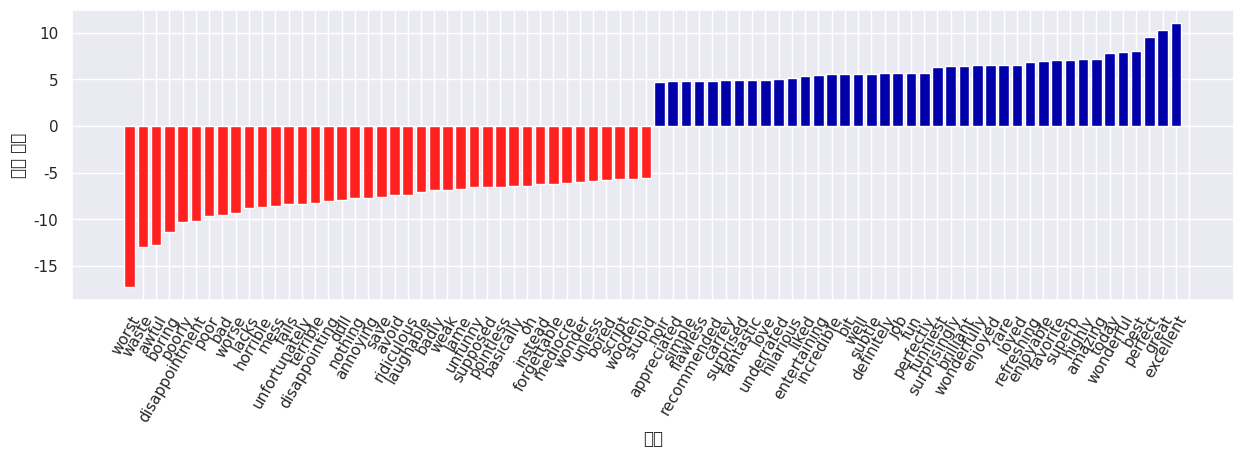

In [16]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
    feature_names, n_top_features=40)

## 7.7 여러 단어로 만든 BOW(n-그램)